In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [12]:
df = df.dropna()
df['sex'].replace('.','FEMALE',inplace=True)

In [13]:
X = pd.get_dummies(df.drop('species',axis=1), drop_first=True)
y = df['species']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Random Forest Classification

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
#help(RandomForestClassifier)

In [17]:
model = RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=101)

In [18]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [19]:
pred = model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [21]:
confusion_matrix(y_test,pred)

array([[40,  1,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]])

In [22]:
model.feature_importances_

array([3.46584088e-01, 1.20150588e-01, 2.39262547e-01, 1.48533620e-01,
       1.39253740e-01, 2.10550136e-05, 6.19436222e-03])

### Choosing correct number of trees

In [25]:
test_error = []

for n in range(1,40):
    model1 = RandomForestClassifier(n_estimators=n,max_features='sqrt')
    model1.fit(X_train,y_train)
    test_pred = model1.predict(X_test)
    test_error.append(1-accuracy_score(test_pred,y_test))

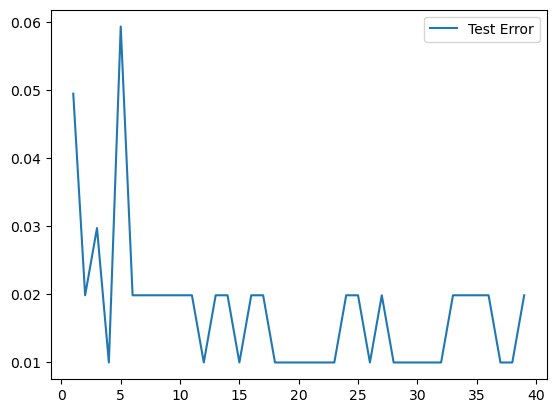

In [27]:
plt.plot(range(1,40),test_error, label='Test Error')
plt.legend()